# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import tt_solve_power
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [26]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
df = pd.DataFrame(data=[A, B], index=('A', 'B'), columns=None).T
df.head()

,A,B
0,63.483642,121.694372
1,2.417810,17.287024
2,-3.536954,-81.045742
3,-68.599557,-92.553899
4,10.751461,65.911018


In [47]:
stat_1, p_1 = st.ttest_ind(A, B)
if p_1 > 0.05:
    print(f'p-value = {p_1:.6f}')
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print(f'p-value = {p_1:.6f}')
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

p-value = 0.084510
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


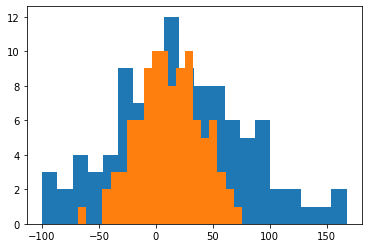

In [48]:
plt.hist(B, bins=20)
plt.hist(A, bins=20)
plt.show()

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [80]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
cucumbers = pd.DataFrame(data=[water, nutri, mineral], index=('water', 'nutri', 'mineral')).T
cucumbers['water'] = cucumbers['water'].fillna(cucumbers['water'].mode()[0]) # заполнил NaN модой.
cucumbers

,water,nutri,mineral
0,1.0,1.0,2.0
1,2.0,2.0,1.0
2,3.0,4.0,1.0
3,4.0,6.0,3.0
4,2.0,5.0,2.0
5,4.0,6.0,4.0
6,2.0,7.0,2.0
7,4.0,5.0,4.0
8,5.0,4.0,5.0
9,2.0,5.0,4.0


In [88]:
fvalue_2, pvalue_2 = st.f_oneway(cucumbers['water'], cucumbers['nutri'], cucumbers['mineral'])

print(f'Статистика={fvalue_2:.4f} p={pvalue_2:.6f}')
if pvalue_2 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
    
print('\nИсходя из дисперсионного анализа, разница в поливе имеется и различима между нашими методами полива')

Статистика=13.0334 p=0.000020
Отклоняем нулевую гипотезу, средние, вероятно, различаются

Исходя из дисперсионного анализа, разница в поливе имеется и различима между нашими методами полива


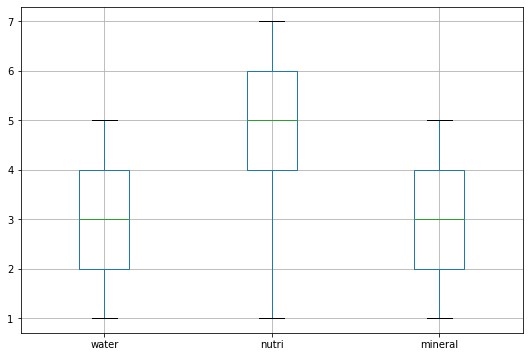


Исходя из графика, разница в поливе имеется мужду 1 и 2, 2 и 3 и не различается в случае 1 и 3 методами полива


In [91]:
cucumbers.boxplot()
plt.show()

print('\nИсходя из графика, разница в поливе имеется мужду 1 и 2, 2 и 3 и не различается в случае 1 и 3 методами полива')

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [94]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.headad()

D:\DataSci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [95]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


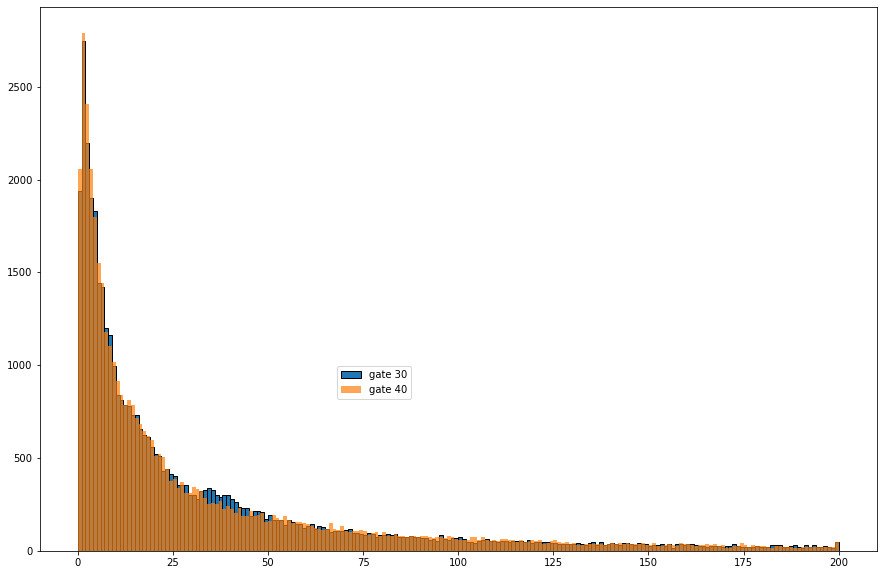

In [147]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))

plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

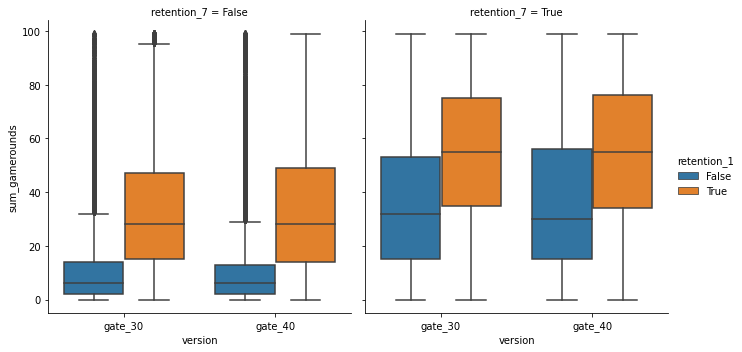

In [97]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<Figure size 1080x720 with 0 Axes>

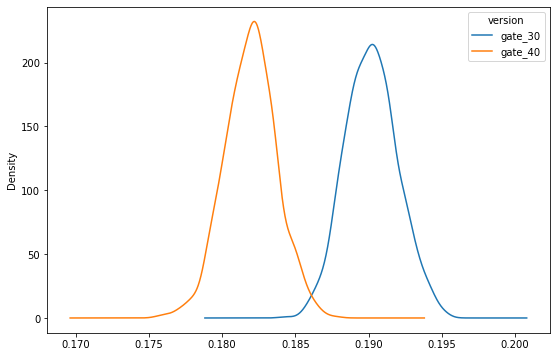

In [149]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')
plt.show()

<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

In [102]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = st.f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

In [203]:
gate_30 = data.loc[data.version == 'gate_30']
gate_40 = data.loc[data.version == 'gate_40']
fvalue_3, pvalue_3 = st.f_oneway(gate_30['sum_gamerounds'], gate_40['sum_gamerounds'])
print(f'F-value: {fvalue_3:.4f}, p-value: {pvalue_3:.6f}')

F-value: 0.7940, p-value: 0.372909


Ниже, пожалуйста, напишите Ваши выводы на основании решения:

1. на гистограмме заметно небольшое количество увеличение аудитории, когда gate установлены на 30-м уровне.
2. На боксплоте есть небольшие изменения в раззные стороны, в том числе и для разных перерывах в заходах в приложение. Визуально сложнее оценить чем на гистограмме.
3. 3-й график. Сложно говорить о чем либо, мы видим синтетические параметры по обеим осям.
4. Дисперсионный анализ: F-value высокий и p-value тоже (сильно выше 0.05 и 0.1). Мы можем с твердостью утверждать, что Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые. Графики выше это подтверждают.

#### Заключение
Подход с изменением установки ворот не возымел большого успеха, и игроки не задерживаются большее количество времени в игре.

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [2]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

D:\DataSci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [3]:
pokemon['Class 2'] = pokemon['Class 2'].fillna('Empty') # заполнил NaN - Empty. Значит у покемона только 1 класс.

In [36]:
filt_1 = pokemon.loc[((pokemon['Class 1'] == 'Grass') | (pokemon['Class 1'] == 'Rock')) | ((pokemon['Class 2'] == 'Grass') | (pokemon['Class 2'] == 'Rock'))]
grass_rock = filt_1.loc[(((filt_1['Class 1'] == 'Grass') & (filt_1['Class 2'] != 'Rock')) | ((filt_1['Class 1'] == 'Rock') & (filt_1['Class 2'] != 'Grass'))) | (((filt_1['Class 2'] == 'Grass') & (filt_1['Class 1'] != 'Rock')) | ((filt_1['Class 2'] == 'Rock') & (filt_1['Class 1'] != 'Grass')))]

grass = grass_rock.loc[(grass_rock['Class 1'] == 'Grass') | (grass_rock['Class 2'] == 'Grass')]
rock = grass_rock.loc[(grass_rock['Class 1'] == 'Rock') | (grass_rock['Class 2'] == 'Rock')]

In [42]:
f_value_5, p_value_5 = st.f_oneway(grass['Attack'], rock['Attack'])

print(f'F-value: {f_value_5:.4f}, p-value: {p_value_5:.6f}')

if p_value_5 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются'\
          '\n\nВероятно действительно есть расхождения в уроне среди разных классов')

F-value: 13.9089, p-value: 0.000273
Отклоняем нулевую гипотезу, средние, вероятно, различаются

Вероятно действительно есть расхождения в уроне среди разных классов


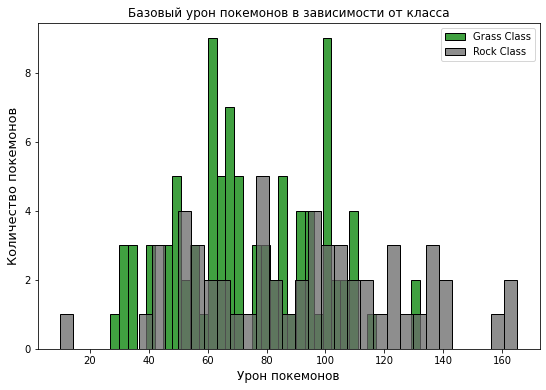

In [124]:
sns.histplot(grass['Attack'], color='green', bins=35)
sns.histplot(rock['Attack'], color='dimgray', bins=35)
plt.title('Базовый урон покемонов в зависимости от класса')
plt.xlabel('Урон покемонов', fontdict={'size':12})
plt.ylabel('Количество покемонов', fontdict={'size':13})
plt.legend(['Grass Class', 'Rock Class'])
plt.show()

#### Профессор Оук был прав в своем предположении.
Исходя из дисперсионного анализа и гистограммы, делаем вывод, что базовый урон между классами 'Grass' и 'Rock' отличается.
Урон покемонов класса 'Grass' в среднем выше и частном выше чем у покемонов класса 'Rock'.

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [93]:
filt_2 = pokemon.loc[((pokemon['Class 1'] == 'Normal') | (pokemon['Class 1'] == 'Water')) | ((pokemon['Class 2'] == 'Normal') | (pokemon['Class 2'] == 'Water'))]
norm_water = filt_2.loc[(((filt_2['Class 1'] == 'Normal') & (filt_2['Class 2'] != 'Water')) | ((filt_2['Class 1'] == 'Water') & (filt_2['Class 2'] != 'Normal'))) | (((filt_2['Class 2'] == 'Normal') & (filt_2['Class 1'] != 'Water')) | ((filt_2['Class 2'] == 'Water') & (filt_2['Class 1'] != 'Normal')))]
normal = norm_water.loc[(norm_water['Class 1'] == 'Normal') | (norm_water['Class 2'] == 'Normal')]
water = norm_water.loc[(norm_water['Class 1'] == 'Water') | (norm_water['Class 2'] == 'Water')]

In [99]:
f_value_6, p_value_6 = st.f_oneway(normal['Speed'], water['Speed'])

print(f'F-value: {f_value_6:.4f}, p-value: {p_value_6:.6f}')

if p_value_6 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются'\
          '\n\nВероятно действительно есть расхождения в скорости среди разных классов')

F-value: 4.6264, p-value: 0.032554
Отклоняем нулевую гипотезу, средние, вероятно, различаются

Вероятно действительно есть расхождения в скорости среди разных классов


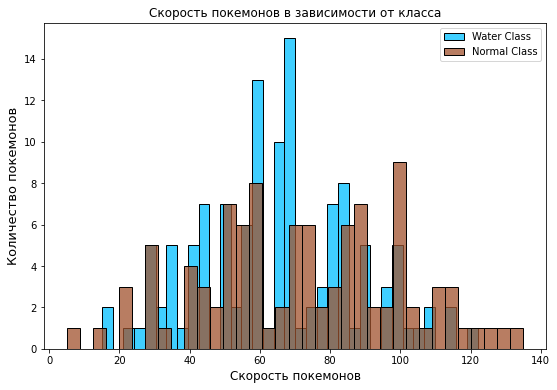

In [121]:
sns.histplot(water['Speed'], color='deepskyblue', bins=35)
sns.histplot(normal['Speed'], color='sienna', bins=35)
plt.title('Скорость покемонов в зависимости от класса')
plt.xlabel('Скорость покемонов', fontdict={'size':12})
plt.ylabel('Количество покемонов', fontdict={'size':13})
plt.legend(['Water Class', 'Normal Class'])
plt.show()

#### Профессор Оук был прав в своем предположении и может спать спокойно :)
Исходя из дисперсионного анализа и гистограммы, делаем вывод, что скорость между классами 'Water' и 'Normal' отличается.
Скорость покемонов класса 'Water' в среднем выше, чем у покемонов класса 'Normal'.

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [244]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
treathed = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]
untreathed = pokemon.loc[~(pokemon['Name'].isin(treathed_pokemon))]

In [245]:
f_value_7, p_value_7 = st.f_oneway(treathed['Speed'], untreathed['Speed'])

print(f'F-value: {f_value_7:.4f}, p-value: {p_value_7:.6f}')

if p_value_7 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются'\
          '\n\nВероятно действительно есть расхождения в скорости среди разных классов')

F-value: 29.0026, p-value: 0.000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются

Вероятно действительно есть расхождения в скорости среди разных классов


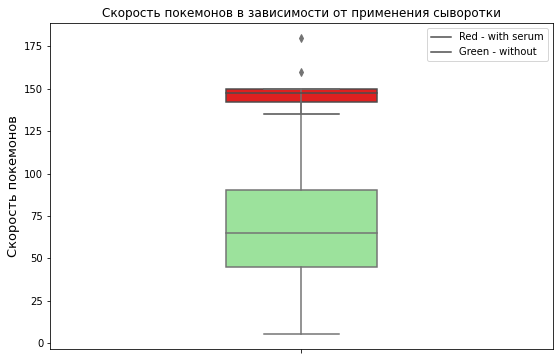

In [246]:
sns.boxplot(y=treathed['Speed'], width=0.3, color='red')
sns.boxplot(y=untreathed['Speed'], width=0.3, color='lightgreen')

plt.title('Скорость покемонов в зависимости от применения сыворотки')
plt.ylabel('Скорость покемонов', fontdict={'size':13})
plt.legend(['Red - with serum', 'Green - without'])
plt.show()

#### Буземный Профессор Оук создал рабочую, даже очень, сыворотку.
Исходя из дисперсионного анализа и боксплота, делаем вывод, что скорость между покемонами с сывороткой и без отличается.
Скорость покемонов с применением сыворотки явно выше, чем у покемонов без нее.

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [289]:
power = pokemon.copy()
power['Sum'] = power['HP']+power['Attack']+power['Defense']
power['Multiply'] = power['HP']*power['Attack']*power['Defense']
power.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Multiply
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,Empty,39,52,43,60,50,65,False,134,87204


In [290]:
legend = power.loc[power['Legendary'] == True]
non_legend = power.loc[power['Legendary'] == False]

### Сумма параметров HP, Attack, Defense

In [295]:
f_value_8, p_value_8 = st.f_oneway(legend['Sum'], non_legend['Sum'])

print(f'F-value: {f_value_8:.4f}, p-value: {p_value_8:.6f}')

if p_value_8 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются'\
          '\n\nВероятно действительно есть расхождения в сумме характеристик HP, Attack, Defense между простыми и ленеградными покемонами')

F-value: 134.3710, p-value: 0.000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются

Вероятно действительно есть расхождения в сумме характеристик HP, Attack, Defense между простыми и ленеградными покемонами


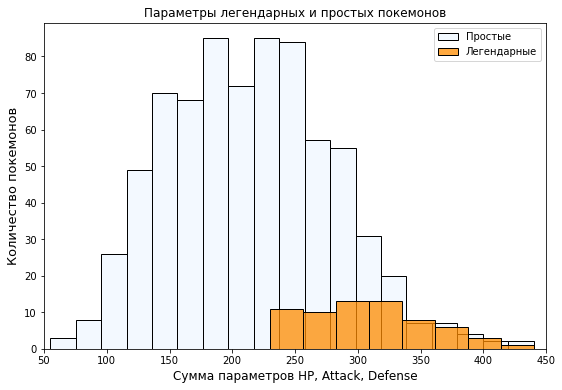

In [293]:
sns.histplot(non_legend['Sum'], color='aliceblue')
plt.xlim(50, 450)
sns.histplot(legend['Sum'], color='darkorange')
plt.xlim(50, 450)

plt.title('Параметры легендарных и простых покемонов')
plt.xlabel('Сумма параметров HP, Attack, Defense', fontdict={'size':12})
plt.ylabel('Количество покемонов', fontdict={'size':13})
plt.legend(['Простые', 'Легендарные'])
plt.show()

#### Вывод:
Исходя из дисперсионного анализа и гистограммы, делаем вывод, что сумма параметров HP, Attack, Defense у легендарных покемонов выше чем не у легендарных.
Пока что проффесор Оук прав в плане легендарных покемонов, они и правда в срднем сильнее.

### Произведение параметров HP, Attack, Defense

In [339]:
f_value_9, p_value_9 = st.f_oneway(legend['Multiply'], non_legend['Multiply'])

print(f'F-value: {f_value_9:.4f}, p-value: {p_value_9:.6f}')

if p_value_9 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются'\
          '\n\nВероятно действительно есть расхождения в произведении характеристик HP, Attack, Defense между простыми и ленеградными покемонами')

F-value: 175.9139, p-value: 0.000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются

Вероятно действительно есть расхождения в произведении характеристик HP, Attack, Defense между простыми и ленеградными покемонами


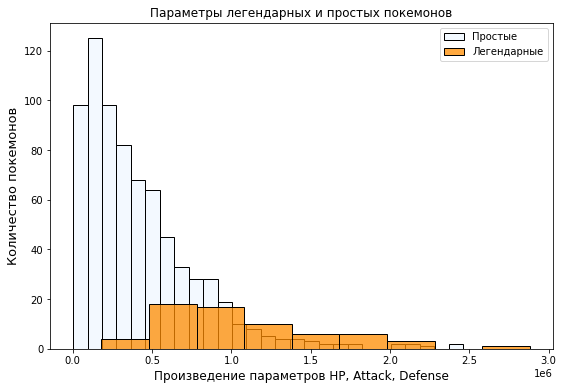

In [296]:
sns.histplot(non_legend['Multiply'], color='aliceblue')
sns.histplot(legend['Multiply'], color='darkorange')

plt.title('Параметры легендарных и простых покемонов')
plt.xlabel('Произведение параметров HP, Attack, Defense', fontdict={'size':12})
plt.ylabel('Количество покемонов', fontdict={'size':13})
plt.legend(['Простые', 'Легендарные'])
plt.show()

#### Вывод:
Исходя из дисперсионного анализа и гистограммы, делаем вывод, что произведение параметров HP, Attack, Defense у легендарных покемонов выше чем не у легендарных.
Пока что проффесор Оук как всегда прав! Легендарные покемоны сильнее!

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [297]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

In [301]:
defense = pokemon.loc[pokemon['Class 1'].isin(best_defence_class) | pokemon['Class 2'].isin(best_defence_class)]
Rock_ = defense.loc[(defense['Class 1']=='Rock') | (defense['Class 2']=='Rock')]
Ground_ = defense.loc[(defense['Class 1']=='Ground') | (defense['Class 2']=='Ground')]
Steel_ = defense.loc[(defense['Class 1']=='Steel') | (defense['Class 2']=='Steel')]
Ice_ = defense.loc[(defense['Class 1']=='Ice') | (defense['Class 2']=='Ice')]

In [350]:
f_value_9, p_value_9 = st.f_oneway(Rock_['Defense'], Ground_['Defense'], Steel_['Defense'], Ice_['Defense'])

print(f'F-value: {f_value_9:.4f}, p-value: {p_value_9:.6f}')

if p_value_9 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются'\
          '\n\nВероятно действительно есть расхождения в защите покемонов разных типов.')

F-value: 10.8201, p-value: 0.000001
Отклоняем нулевую гипотезу, средние, вероятно, различаются

Вероятно действительно есть расхождения в защите покемонов разных типов.


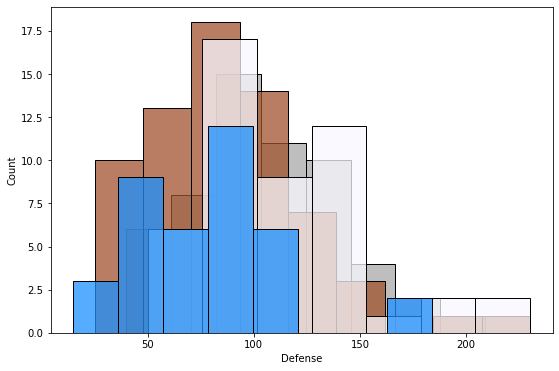

In [343]:
sns.histplot(Rock_['Defense'], color='darkgray')
sns.histplot(Ground_['Defense'], color='sienna')
sns.histplot(Steel_['Defense'], color='ghostwhite')
sns.histplot(Ice_['Defense'], color='dodgerblue')
plt.show()